# Detect and Remove the Outliers using Python

In [59]:
#Comment
#Observation

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [61]:
data=pd.read_csv("C:\\Users\\Admin\\PycharmProjects\\EDA&FeatureEngg\\Dataset\\data1\\Travel.csv")

In [62]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [63]:
# 1) Detecting outliers Using Box Plot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

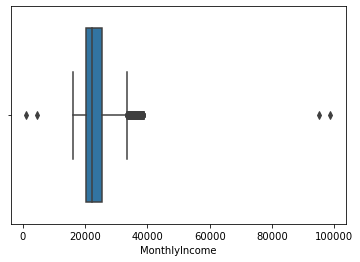

In [64]:
sns.boxplot(data['MonthlyIncome'])

In [65]:
data.shape

(4888, 20)

In [66]:
df1 = data[(data['MonthlyIncome'] > 40000) | (data['MonthlyIncome'] < 15000)] 

In [67]:
df1 # There are 4 rows with outliers having MonthlyIncome above 40000 and below 15000

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


In [68]:
df1.shape

(4, 20)

In [69]:
df2 = data[(data['MonthlyIncome'] <= 40000) & (data['MonthlyIncome'] >= 15000)] 

In [70]:
df2.shape

(4651, 20)

In [71]:
# 2) Detecting outliers Using Scatter plot

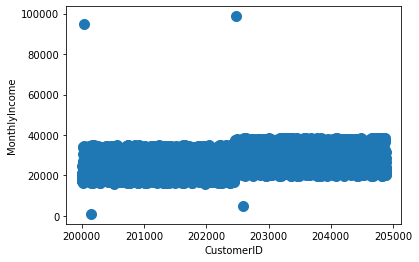

In [72]:
data.plot.scatter(x = 'CustomerID', y = 'MonthlyIncome', s = 100);

In [81]:
# 3) Detecting outliers Using IQR

In [124]:
Q1 = np.percentile(data['MonthlyIncome'], 25)   

In [125]:
Q3 = np.percentile(data['MonthlyIncome'], 75)

In [126]:
Q1

nan

In [127]:
IQR = Q3 - Q1

In [128]:
IQR

nan

In [94]:
upper = Q3 +1.5*IQR

In [96]:
lower = Q1 - 1.5*IQR

In [121]:
upper = data[data['MonthlyIncome'] >= (Q3+1.5*IQR)]   

In [122]:
lower = data[data['MonthlyIncome'] <= (Q1-1.5*IQR)]

In [115]:
outliers = data[(data['MonthlyIncome'] > upper) | (data['MonthlyIncome'] < lower)]